In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [38]:
df_original = pd.read_csv('well_header0.csv')
tvd=df_original['TVD']

In [39]:
df = pd.read_csv('well_header_clean.csv')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df,tvd,test_size=0.2,random_state=42)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred= lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test,pred)
linrmse=np.sqrt(lin_mse)
linrmse

74369343.54620986

In [42]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
pred_rf= rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test,pred_rf)
rfrmse=np.sqrt(rf_mse)
rfrmse

96.18202135189104

In [43]:
ab_reg = RandomForestRegressor()
ab_reg.fit(X_train,y_train)
pred_ab= ab_reg.predict(X_test)
ab_mse = mean_squared_error(y_test,pred_ab)
abrmse=np.sqrt(ab_mse)
abrmse

97.01477165360718

<BarContainer object of 8 artists>

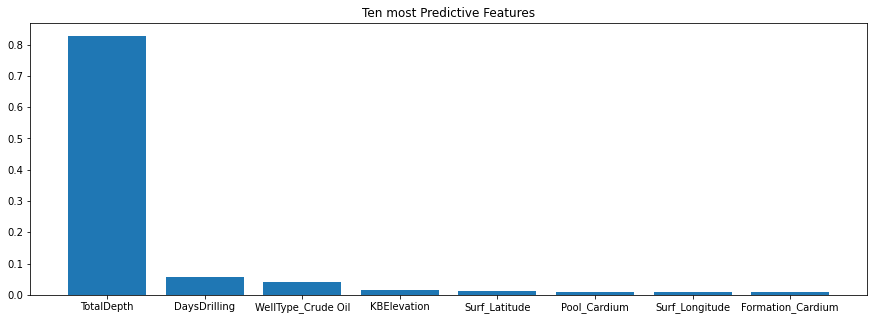

In [44]:
feature_importance=rf_reg.feature_importances_
importances=pd.DataFrame(df.columns,feature_importance,columns=['Feature']).reset_index()
importances.columns = ['weight','Feature']
importances = importances.sort_values(['weight'],ascending=False)
imp_plot = importances.iloc[:8]
imp_feature = importances['Feature']
fig = plt.figure(figsize=(15,5))
plt.title('Ten most Predictive Features')
plt.bar(imp_plot['Feature'],imp_plot['weight'])

In [45]:
test_df = pd.read_csv('test0.csv')